# EDA Project Roadmap 
## 1. Importing necessary libraries
    1. pandas for data processing
    2. numpy for mathematical operations
    3. matplotlib.plotly, seaborn & plotly.express for data vizualisations (instead if tableau)
## 2. get an overview and deep review of the data.
    1. using info & describe functions
    2. using head & tail functions to view the data
## 3. Handling missing values
    1. using isull.sum # Count missing values per column
    2. using heatmap sns.heatmap(data.isnull(), cbar=False)  # Visualize missing data
    3. fill or drop missing values according to the dataset and logic.
    4. check for outliets using sns.boxplot(x=data['column_name']) for numerical columns.
## 4. Data Structuring
    1. Creating required columns.
    2. changing the datatypes of the columns
## 5. vizualizing the data
    1. using seaborn and matplotlib to provide detailed vizulaisations
## 6. provide insights from vizualisations
    1. prepare a summery report including the insights.

# 1. Importing libraries & packages

In [150]:
!pip install lifelines

In [151]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from lifelines import KaplanMeierFitter

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/healthcare-dataset/healthcare_dataset.csv


# 2. get an overview and deep review of the data.

In [152]:
#2.1 Reading the data into CSV
df = pd.read_csv('/kaggle/input/healthcare-dataset/healthcare_dataset.csv')

In [153]:
#2.2.1 Getting an overview of the data with the info function
df.info()
# the data frame has 55500 rows of data and 15 columns
# the dominant dtype is of type object which should be addressed in case of conversion to datetime is required.
# the data contains no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [154]:
#2.2.2 getting overview of the numerical data
df.describe()
# the float and integar columns are returned
# the room number data obtained is not required as it doesnt lead to any conlcusion
# the billing amount shows -ve values which should be checked in the cleaning section

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [155]:
#2.3.1 getting an overview of the dataframe using the head function
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [156]:
#2.3.1 getting an overview of the dataframe using the tail function
df.tail()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal
55499,jAMES GARCiA,53,Female,O+,Arthritis,2024-04-02,Dennis Warren,Henry Sons and,Aetna,4010.134172,448,Urgent,2024-04-29,Ibuprofen,Abnormal


# 3. Handling missing values

In [157]:
# checking missing values
df.isnull().sum() 

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

<Axes: >

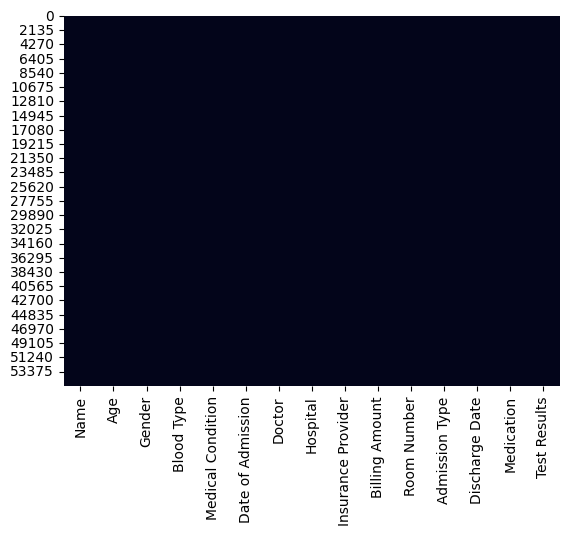

In [158]:
#plotting missing values (this is not required but kept for standardization purposes)
sns.heatmap(df.isnull(), cbar=False)

## 3.1. Checking for misspelling and wrong enteries in columns (Medical Condition, Blood Type, Hospital, Insurance Provider, Admission Type, and Medication)

  Medical Condition  Count
0         Arthritis   9308
1          Diabetes   9304
2      Hypertension   9245
3           Obesity   9231
4            Cancer   9227
5            Asthma   9185


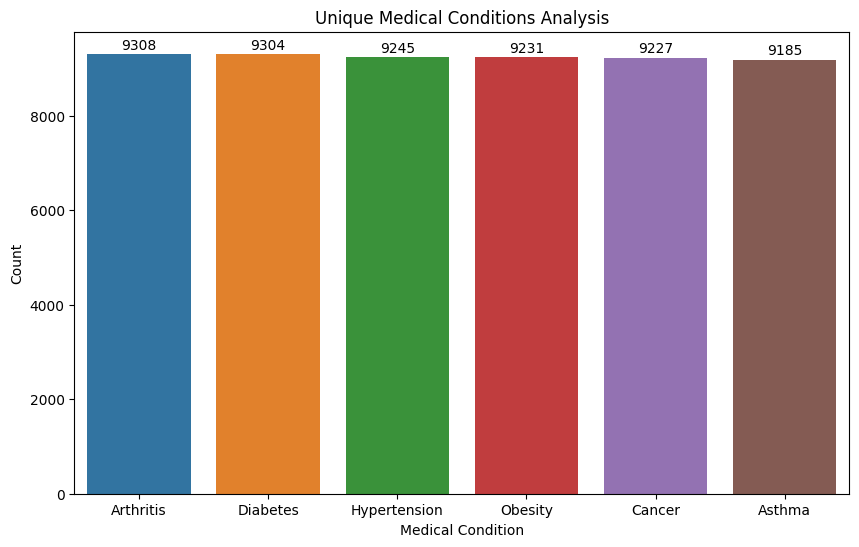

In [159]:
unique_mdeical_conditions = df['Medical Condition'].value_counts().copy()
unique_mdeical_conditions = unique_mdeical_conditions.reset_index()
unique_mdeical_conditions.columns = ['Medical Condition', 'Count']
print(unique_mdeical_conditions)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns_barplot = sns.barplot(data=unique_mdeical_conditions, x='Medical Condition', y='Count')
sns.barplot(data=unique_mdeical_conditions, x='Medical Condition', y='Count')
plt.title("Unique Medical Conditions Analysis")
#plt.xticks(rotation=45)  # Rotate x-axis labels for readability if needed
# Add labels
for index, row in unique_mdeical_conditions.iterrows():
    sns_barplot.text(index, row.Count + 100, str(round(row.Count, 2)), color='black', ha="center")

plt.show()

In [160]:
df['Blood Type'].value_counts()

Blood Type
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: count, dtype: int64

In [161]:
df['Hospital'].value_counts()

Hospital
LLC Smith                      44
Ltd Smith                      39
Johnson PLC                    38
Smith Ltd                      37
Smith PLC                      36
                               ..
and Montoya Flores, Boyer       1
Carter and Dunn King,           1
Hall, Brown Black and           1
Peterson Scott and Thomas,      1
Moreno Murphy, Griffith and     1
Name: count, Length: 39876, dtype: int64

In [162]:
df['Insurance Provider'].value_counts()

Insurance Provider
Cigna               11249
Medicare            11154
UnitedHealthcare    11125
Blue Cross          11059
Aetna               10913
Name: count, dtype: int64

In [163]:
df['Admission Type'].value_counts()

Admission Type
Elective     18655
Urgent       18576
Emergency    18269
Name: count, dtype: int64

In [164]:
df['Medication'].value_counts()

Medication
Lipitor        11140
Ibuprofen      11127
Aspirin        11094
Paracetamol    11071
Penicillin     11068
Name: count, dtype: int64

In [165]:
df['Gender'].value_counts()

Gender
Male      27774
Female    27726
Name: count, dtype: int64

In [166]:
df['Test Results'].value_counts()

Test Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64

In [167]:
# check the -ve values in the Billing Amount column
negative_billing_data = df[df['Billing Amount'] < 0].copy()
negative_billing_data.shape
# there are 108 negative billing amount enteries
#Negative billing amounts are normal in hospital billing data but can provide insights into operational issues, patient financial policies, or areas where billing processes might need adjustment.
# these data will remain, in the original analysis, but can also be analyzed individually

(108, 15)

In [168]:
# create a separate dataframe for positive billing only
positive_billing_data = df[df['Billing Amount'] >= 0].copy()
positive_billing_data.shape
# these 2 data frames will be studied against each others after analysis of the main dataset
# the reason for analysis will be to check for bias when providing medications

(55392, 15)

In [169]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


# 3. Data Structuring
## 3.1. Create year, month, day, quarter columns from column Date of Admission
## 3.2. Create year, month, day, quarter columns from column Discharge Date
## 3.3. modify the Name column to make each name start with upper case

In [170]:
#3.1.1 change the dtype of the Date of Admission column to datetime
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Date of Admission'].dtype

dtype('<M8[ns]')

In [171]:
#3.1.2. Create year, month, day, quarter columns from date of admission column

df['Admission_Year'] = df['Date of Admission'].dt.year
df['Admission_Month'] = df['Date of Admission'].dt.strftime('%b')  # Format as abbreviated month name (Jan, Feb, ...)
df['Admission_Quarter'] = df['Date of Admission'].dt.quarter
df['Admission_Day'] = df['Date of Admission'].dt.day

In [172]:
#check the implementation
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Admission_Year,Admission_Month,Admission_Quarter,Admission_Day
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2024,Jan,1,31
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,2019,Aug,3,20
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,2022,Sep,3,22
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,2020,Nov,4,18
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,2022,Sep,3,19


In [173]:
#3.2.1 change the dtype of the Discharge Date column to datetime
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Discharge Date'].dtype

dtype('<M8[ns]')

In [174]:
#3.2.2. Create year, month, day, quarter columns from date of admission column

df['Discharge_Year'] = df['Discharge Date'].dt.year
df['Discharge_Month'] = df['Discharge Date'].dt.strftime('%b')  # Format as abbreviated month name (Jan, Feb, ...)
df['Discharge_Quarter'] = df['Discharge Date'].dt.quarter
df['Discharge_Day'] = df['Discharge Date'].dt.day

In [175]:
#check the implementation
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Medication,Test Results,Admission_Year,Admission_Month,Admission_Quarter,Admission_Day,Discharge_Year,Discharge_Month,Discharge_Quarter,Discharge_Day
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,...,Paracetamol,Normal,2024,Jan,1,31,2024,Feb,1,2
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,...,Ibuprofen,Inconclusive,2019,Aug,3,20,2019,Aug,3,26
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,...,Aspirin,Normal,2022,Sep,3,22,2022,Oct,4,7
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,...,Ibuprofen,Abnormal,2020,Nov,4,18,2020,Dec,4,18
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,...,Penicillin,Abnormal,2022,Sep,3,19,2022,Oct,4,9


In [176]:
#3.3 modify the Name, Doctor and Hospital column to be of upper case (eg. Leslie Terry) using str.title()
exceptions = ['and', 'or', 'of', 'the', 'a', 'in', 'for', 'to', 'by']
df['Name'] = df['Name'].str.title()
df['Name'] = df['Name'].apply(lambda x: ' '.join([word if word.lower() not in exceptions else word.lower() for word in x.split()]))
df['Doctor'] = df['Doctor'].str.title()
df['Doctor'] = df['Doctor'].apply(lambda x: ' '.join([word if word.lower() not in exceptions else word.lower() for word in x.split()]))
df['Hospital'] = df['Hospital'].str.title()
df['Hospital'] = df['Hospital'].apply(lambda x: ' '.join([word if word.lower() not in exceptions else word.lower() for word in x.split()]))

In [177]:
#check the implementation
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Medication,Test Results,Admission_Year,Admission_Month,Admission_Quarter,Admission_Day,Discharge_Year,Discharge_Month,Discharge_Quarter,Discharge_Day
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,...,Paracetamol,Normal,2024,Jan,1,31,2024,Feb,1,2
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,...,Ibuprofen,Inconclusive,2019,Aug,3,20,2019,Aug,3,26
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.096079,...,Aspirin,Normal,2022,Sep,3,22,2022,Oct,4,7
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,...,Ibuprofen,Abnormal,2020,Nov,4,18,2020,Dec,4,18
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,...,Penicillin,Abnormal,2022,Sep,3,19,2022,Oct,4,9


In [178]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Admission_Year', 'Admission_Month',
       'Admission_Quarter', 'Admission_Day', 'Discharge_Year',
       'Discharge_Month', 'Discharge_Quarter', 'Discharge_Day'],
      dtype='object')

# 4. Preparing Date for vizualisation
   ## 4.1. Patient Demographics Analysis
   ## 4.2.  Medical Condition and Treatment Analysis
   ## 4.3. Admission and Discharge Analysis
   ## 4.4. Financial Analysis (Billing and Insurance)
   ## 4.5. Doctor and Hospital Performance Analysis
   ## 4.6. Medication and Test Result Analysis
   ## 4.7. Seasonality and Trends
   ## 4.8. Survival Analysis (if applicable)
   ## 4.9. Patient Flow and Resource Utilization
   ## 4.10. Outlier Detection and Anomaly Analysis

## 4.1. Patient Demographics Analysis
* Age distribution: Understand the age distribution of patients to identify trends (e.g., more children, elderly, or middle-aged patients).
* Analysis: Group patients into age categories (e.g., 0-18, 19-35, 36-50, 51-65, 66+).
* Insights: This could help in tailoring services, adjusting staffing levels, or optimizing hospital facilities.
* Gender and name analysis: If the dataset contains gender information (or if names suggest gender), you can analyze if there are any gender-based trends in medical conditions or treatments.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


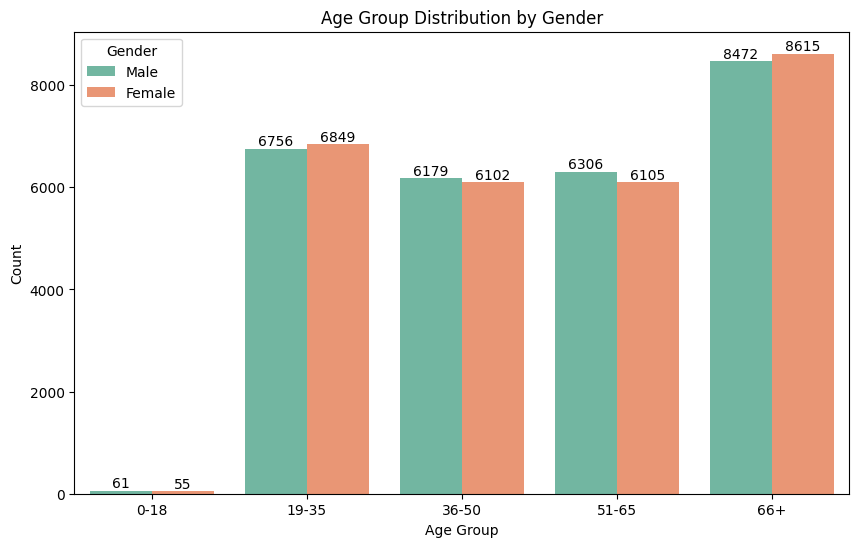

In [179]:
# Define age groups
age_bins = [0, 18, 35, 50, 65, 100]
age_labels = ['0-18', '19-35', '36-50', '51-65', '66+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Create the countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Age Group', hue='Gender', data=df, palette='Set2')

# Adding labels to each bar
for p in ax.patches:
    # Get the height of each bar
    height = p.get_height()
    
    # Add the label (count) above each bar
    ax.text(
        p.get_x() + p.get_width() / 2,  # x-position (center of the bar)
        height + 0.1,  # y-position (just above the bar)
        int(height),  # Value to display
        ha='center',   # Horizontal alignment
        va='bottom',   # Vertical alignment
        fontsize=10     # Font size of the label
    )

# Adding labels and title
plt.title('Age Group Distribution by Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

## 4.2. Medical Condition & treatment Analysis
* Most common medical conditions: Identify the most frequently occurring medical conditions within the dataset.
    * Analysis: Group by medical condition and count occurrences.
    * Insights: Helps identify which conditions are most common in the patient population and could inform hospital planning, resource allocation, and even insurance models.
* Treatment effectiveness: If treatment data (medication, test results, doctor) are available, analyze the relationship between treatments prescribed and patient outcomes.
    * Analysis: Cross-reference medication, test results, and discharge date with medical condition and see if there is a pattern in improvement or recovery.

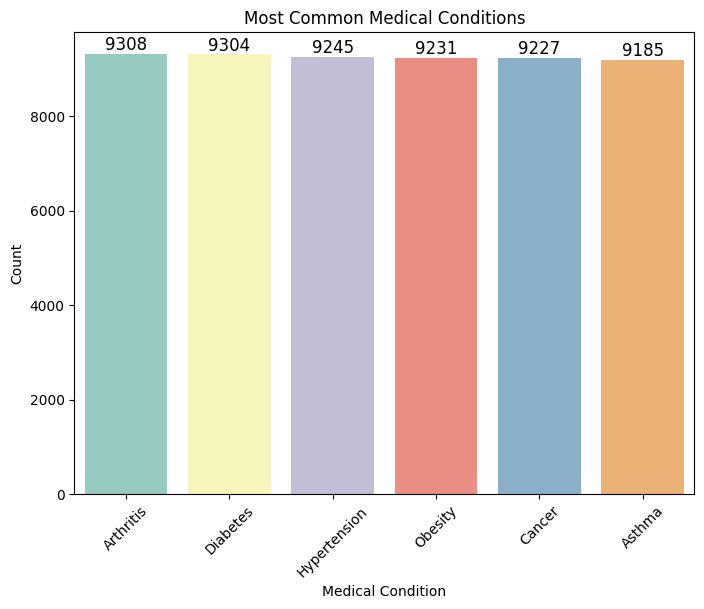

In [180]:
# Count the most common medical conditions
condition_counts = df['Medical Condition'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=condition_counts.index, y=condition_counts.values, palette='Set3')

# Adding labels to each bar
for p in ax.patches:
    # Get the height of each bar (the count)
    height = p.get_height()
    
    # Add the label (count) above each bar
    ax.text(
        p.get_x() + p.get_width() / 2,  # x-position (center of the bar)
        height + 0.1,  # y-position (just above the bar)
        int(height),  # Value to display
        ha='center',   # Horizontal alignment
        va='bottom',   # Vertical alignment
        fontsize=12,   # Font size of the label
        color='black'  # Text color
    )

# Adding labels and title
plt.title('Most Common Medical Conditions')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## 4.3. Admission and Discharge Analysis
* Admission type trends: Identify patterns related to admission type (e.g., emergency, scheduled, elective) and their correlation to outcomes or costs.
    * Analysis: Compare admission type with billing amount, discharge date, and medical condition to assess if certain types of admissions result in higher costs or longer stays.
* Length of Stay (LOS): Calculate the difference between date of admission and discharge date to find out the average length of stay for different medical conditions, admission types, or doctors.
    * Analysis: Create a length of stay column and analyze its distribution.
    * Insights: Hospitals may optimize bed usage, reduce unnecessary length of stays, or improve discharge processes.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


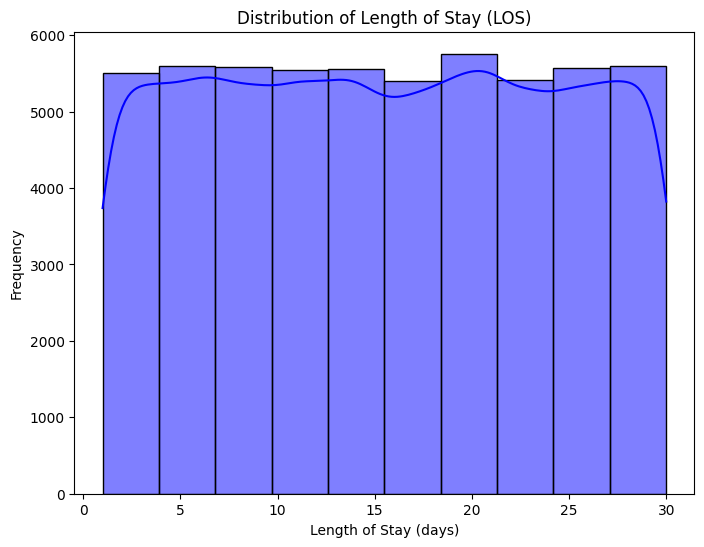

In [181]:
# Calculate Length of Stay (LOS)
df['LOS'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Plot Length of Stay distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['LOS'], kde=True, color='blue', bins=10)
plt.title('Distribution of Length of Stay (LOS)')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.show()

## 4.4. Financial Analysis: Billing Amount Distribution
* Billing amount distribution: Analyze the distribution of billing amount across different conditions, admission types, and hospitals.
    * Analysis: Group by medical condition or hospital and calculate the mean, median, and range of billing amount.
    * Insights: Helps identify which conditions or hospitals incur higher costs. Can also be useful for budgeting and cost control.
* Insurance provider analysis: Analyze the relationship between insurance providers and patient billing amounts.
    * Analysis: Compare average billing amounts across different insurance providers.
    * Insights: Determine if certain insurance providers are linked to higher or lower billing amounts, which could inform negotiations or payment plans.

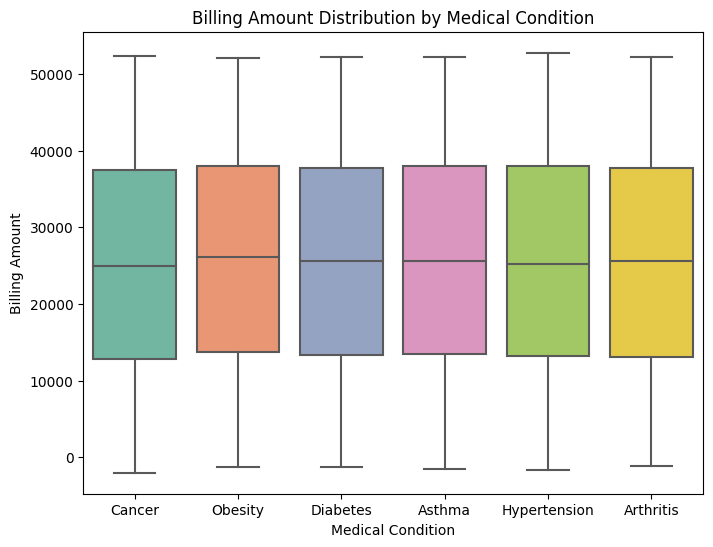

In [182]:
# Plot billing amount by medical condition
plt.figure(figsize=(8, 6))
sns.boxplot(x='Medical Condition', y='Billing Amount', data=df, palette='Set2')
plt.title('Billing Amount Distribution by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Billing Amount')
plt.show()

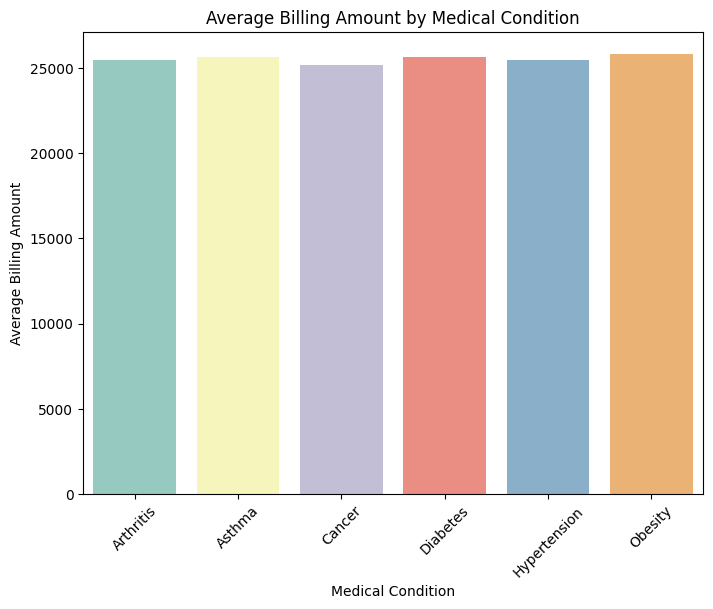

In [183]:
# Group by medical condition and calculate the mean billing amount
billing_by_condition = df.groupby('Medical Condition')['Billing Amount'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Medical Condition', y='Billing Amount', data=billing_by_condition, palette='Set3')
plt.title('Average Billing Amount by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Average Billing Amount')
plt.xticks(rotation=45)
plt.show()

## 4.5. Doctor and Hospital performance analysis
* Doctor performance: Analyze the average length of stay and patient outcomes (if available) for each doctor.
    * Analysis: Group by doctor and calculate the average length of stay (length of stay column) or any available patient outcome indicators.
    * Insights: Identify which doctors have the longest or shortest patient recovery times, potentially highlighting best practices or areas for improvement.
* Hospital performance: Compare hospitals by metrics like average length of stay, billing amount, and most common medical conditions treated.
    * Analysis: Group by hospital and calculate the average billing amount, length of stay, and other variables.
    * Insights: This can highlight hospital efficiency and help in resource management.

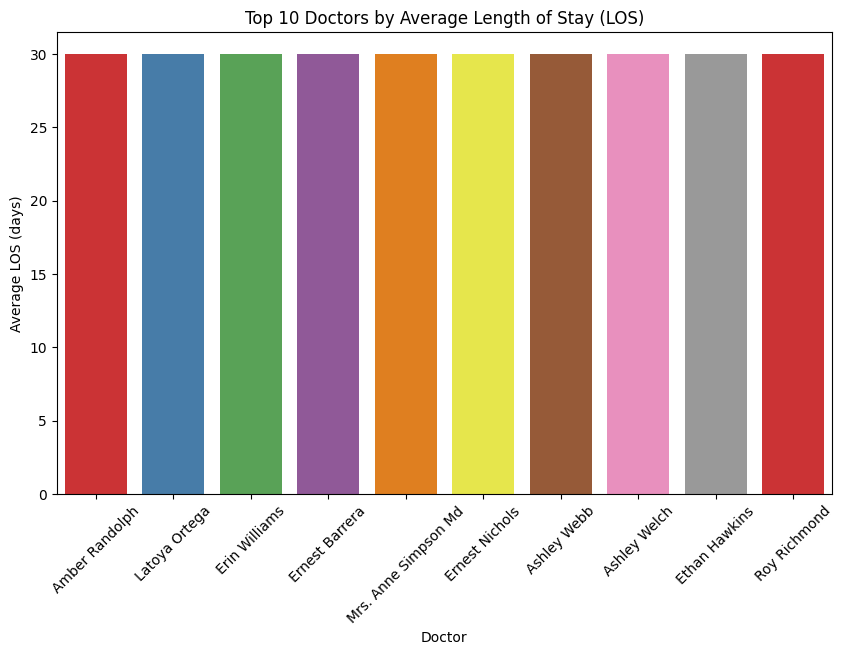

In [197]:
# Calculate average LOS per doctor and reset index
doctor_performance = df.groupby('Doctor')['LOS'].mean().reset_index()

# Sort by LOS in descending order
doctor_performance = doctor_performance.sort_values(by='LOS', ascending=False)

# Select the top 10 doctors based on average LOS
top_doctors = doctor_performance.head(10)

# Plotting the top 10 doctors by average LOS
plt.figure(figsize=(10, 6))
sns.barplot(x='Doctor', y='LOS', data=top_doctors, palette='Set1')

# Adding labels and title
plt.title('Top 10 Doctors by Average Length of Stay (LOS)')
plt.xlabel('Doctor')
plt.ylabel('Average LOS (days)')
plt.xticks(rotation=45)
plt.show()

## 4.6. Medication and Test Result Analysis
* Medication prescription patterns: Identify the most commonly prescribed medications and their association with specific medical conditions.
    * Analysis: Group by medication and medical condition to identify trends.
    * Insights: Can reveal standard treatments for particular conditions and help standardize care protocols.
* Test result analysis: If the test results are numeric (e.g., blood pressure, cholesterol levels), you can analyze how certain conditions correlate with abnormal test results.
    * Analysis: For each medical condition, look at the distribution of test results.
    * Insights: This may help in refining diagnostic criteria and identifying potential areas for further medical research.

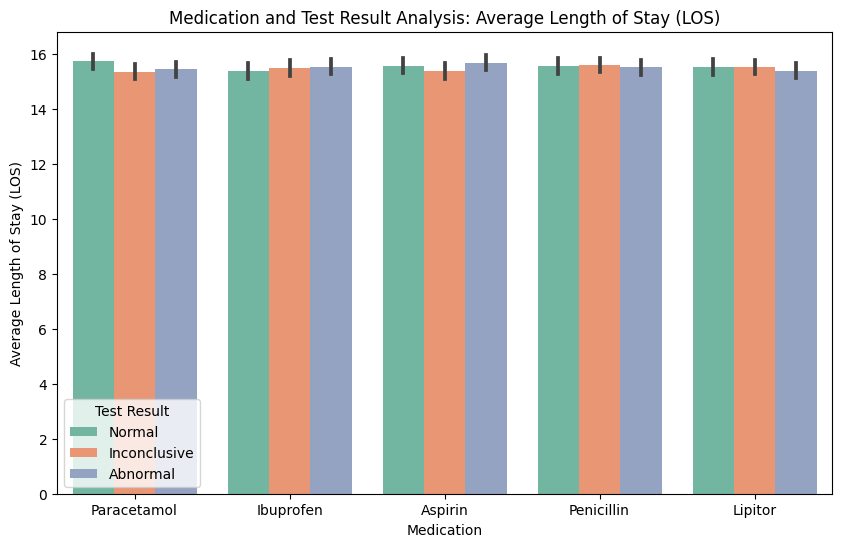

In [185]:
# Create a grouped bar plot for Medication vs Test Result and their average LOS
plt.figure(figsize=(10, 6))
sns.barplot(x='Medication', y='LOS', hue='Test Results', data=df, palette='Set2')

# Adding labels and title
plt.title('Medication and Test Result Analysis: Average Length of Stay (LOS)')
plt.xlabel('Medication')
plt.ylabel('Average Length of Stay (LOS)')
plt.legend(title='Test Result')
plt.show()

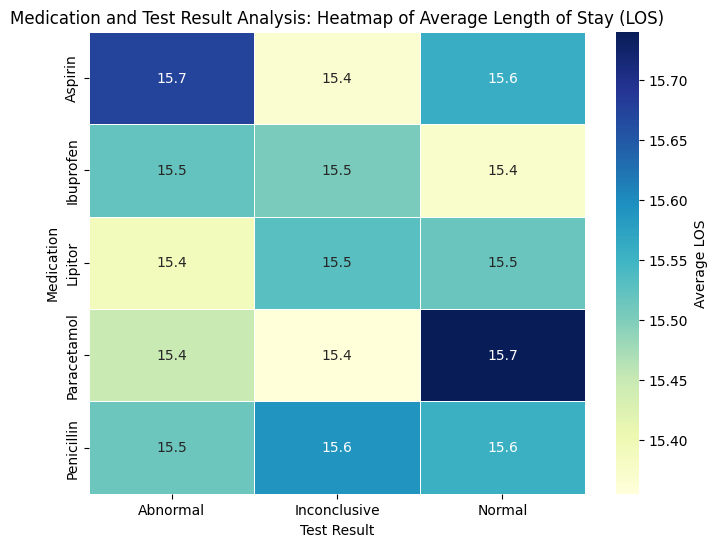

In [186]:
#using a heatmap
# Pivot the data to create a matrix for the heatmap
pivot_df = df.pivot_table(values='LOS', index='Medication', columns='Test Results', aggfunc='mean')

# Create a heatmap to visualize the average LOS for each combination of Medication and Test Result
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt='.1f', cbar_kws={'label': 'Average LOS'}, linewidths=0.5)

# Adding labels and title
plt.title('Medication and Test Result Analysis: Heatmap of Average Length of Stay (LOS)')
plt.xlabel('Test Result')
plt.ylabel('Medication')
plt.show()

## 4.7. Seasonaility and Trends
* Seasonality of admissions: Check if there are trends in patient admissions over time (e.g., more admissions in winter due to flu season).
    * Analysis: Create a month column from the date of admission and group by it.
    * Insights: Helps optimize staffing and resource allocation during peak seasons.
* Admission trends over time: Track how the number of admissions (or specific conditions) changes over time.
    * Analysis: Analyze trends based on the date of admission to see if certain diseases or treatments become more common over the years.
    * Insights: Useful for anticipating future medical trends and preparing for outbreaks or shifts in medical needs.

In [187]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Admission_Year,Admission_Month,Admission_Quarter,Admission_Day,Discharge_Year,Discharge_Month,Discharge_Quarter,Discharge_Day,Age Group,LOS
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,...,2024,Jan,1,31,2024,Feb,1,2,19-35,2
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,...,2019,Aug,3,20,2019,Aug,3,26,51-65,6
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.096079,...,2022,Sep,3,22,2022,Oct,4,7,66+,15
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,...,2020,Nov,4,18,2020,Dec,4,18,19-35,30
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,...,2022,Sep,3,19,2022,Oct,4,9,36-50,20


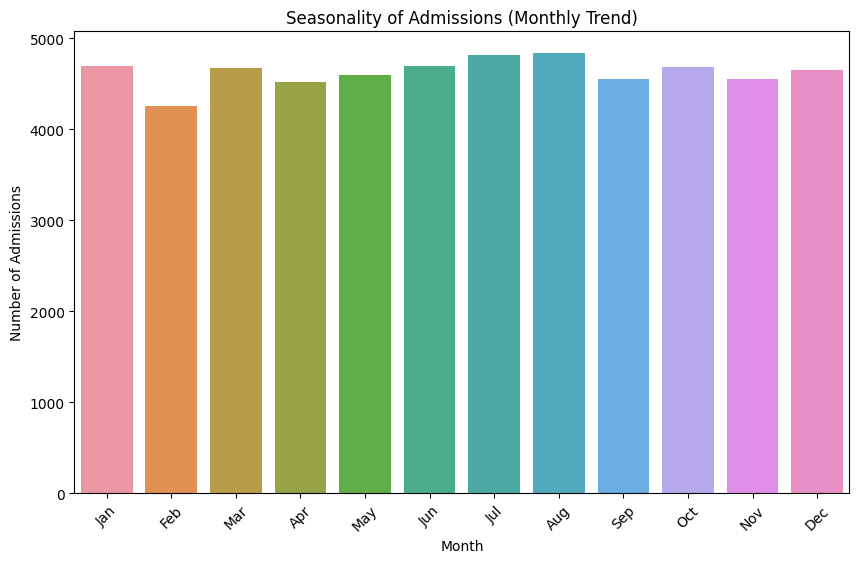

In [188]:
# Plotting seasonality (Monthly Admission Trends)
plt.figure(figsize=(10, 6))
sns.countplot(x='Admission_Month', data=df, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Seasonality of Admissions (Monthly Trend)')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


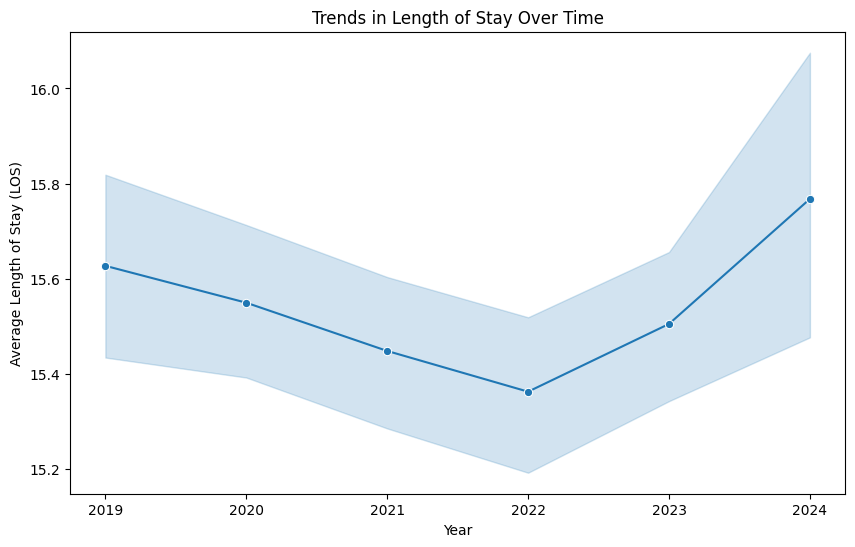

In [189]:
# Optionally, we can also plot trends over years:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Admission_Year', y='LOS', data=df, marker='o')
plt.title('Trends in Length of Stay Over Time')
plt.xlabel('Year')
plt.ylabel('Average Length of Stay (LOS)')
plt.show()

## 4.8. Survival Analysis done using 
* Time-to-event analysis: If your dataset has data on recovery, re-admissions, or patient survival, you could perform survival analysis.
    * Analysis: Use date of admission and discharge date (or other relevant dates) to compute the time to recovery, and explore correlations with conditions, medications, or doctors.
    * Insights: Helps evaluate the effectiveness of treatments or identify high-risk patients.

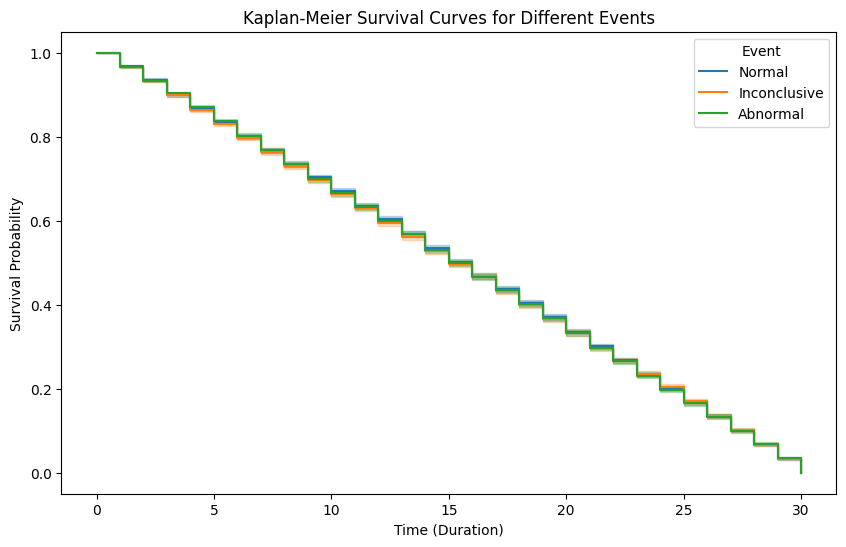

In [190]:
# Create a Kaplan-Meier Fitter object
kmf = KaplanMeierFitter()

# Plotting survival curves for each category of event
plt.figure(figsize=(10, 6))

# Iterate over each category in the 'Event' column and plot a Kaplan-Meier curve for each
for event in df['Test Results'].unique():
    # Filter data for each event type
    event_data = df[df['Test Results'] == event]
    
    # Fit the Kaplan-Meier estimator
    kmf.fit(durations=event_data['LOS'], event_observed=event_data['Test Results'].notnull())
    
    # Plot the survival function for the event
    kmf.plot_survival_function(label=event)

# Adding labels and title
plt.title('Kaplan-Meier Survival Curves for Different Events')
plt.xlabel('Time (Duration)')
plt.ylabel('Survival Probability')
plt.legend(title='Event')
plt.show()

## 4.9. Patient flow and resource utilization
* Patient flow analysis: You can analyze how patients flow through the hospital based on the admission type, doctor, and discharge date.
    * Analysis: Track the number of patients admitted and discharged on a daily or weekly basis.
    * Insights: Helps identify periods of peak hospital activity and optimize staffing or resource allocation.
* Resource allocation: If you have data on resource usage (e.g., beds, medical staff, equipment), you can analyze the relationship between patient volume, types of admission, and resource needs.

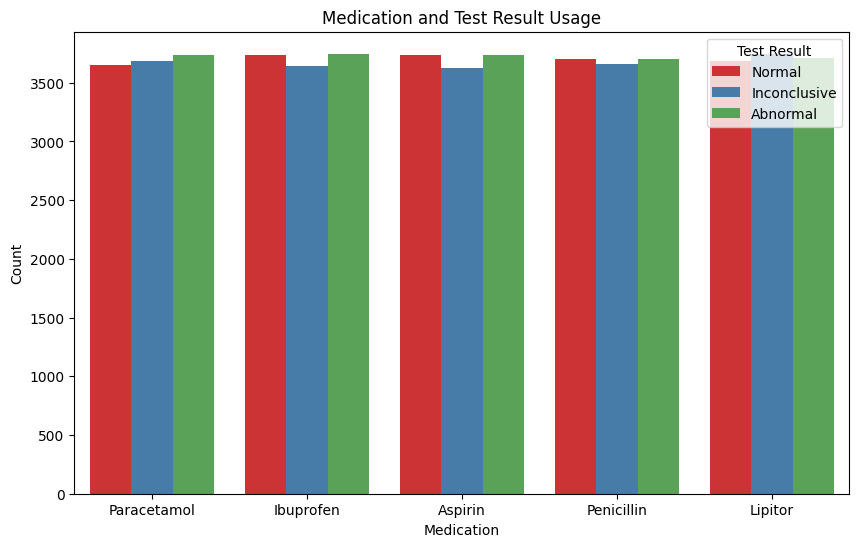

In [191]:
# Resource Utilization: Medication and Test Result
plt.figure(figsize=(10, 6))
sns.countplot(x='Medication', hue='Test Results', data=df, palette='Set1')
plt.title('Medication and Test Result Usage')
plt.xlabel('Medication')
plt.ylabel('Count')
plt.legend(title='Test Result')
plt.show()

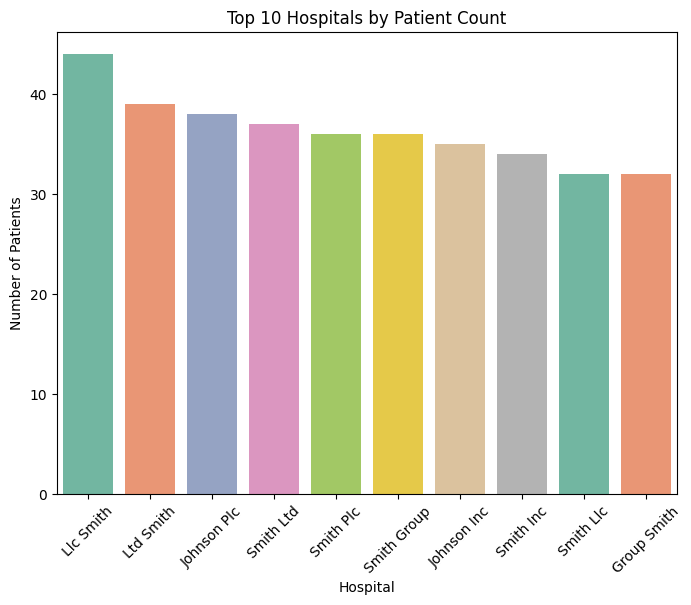

In [192]:
# Plot patient flow between departments (count of patients in each department)
# Calculate the value counts of hospitals
hospital_counts = df['Hospital'].value_counts()

# Select top N hospitals (e.g., top 5)
top_hospitals = hospital_counts.head(10)

# Plotting the top N hospitals
plt.figure(figsize=(8, 6))
sns.barplot(x=top_hospitals.index, y=top_hospitals.values, palette='Set2')

# Adding labels and title
plt.title('Top 10 Hospitals by Patient Count')
plt.xlabel('Hospital')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.show()

## 4.10. Outlier Detection and Anomaly Analysis
* Outliers in billing: You can identify patients whose billing amounts are unusually high or low.
    * Analysis: Detect outliers in billing amount and investigate if they correspond to specific medical conditions, doctors, or hospitals.
    * Insights: Helps in detecting fraud, billing errors, or other anomalies in the system.

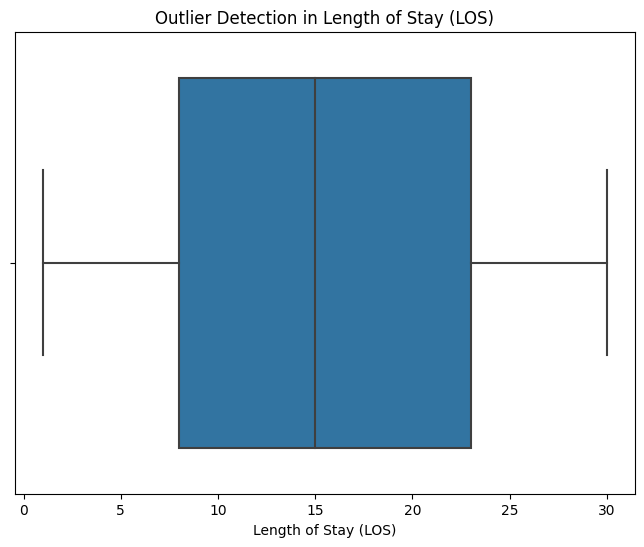

In [193]:
# Boxplot to visualize outliers in LOS
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['LOS'])
plt.title('Outlier Detection in Length of Stay (LOS)')
plt.xlabel('Length of Stay (LOS)')
plt.show()

In [194]:
# Z-Score for outlier detection (greater than 3 or less than -3 are considered outliers)
z_scores = np.abs(stats.zscore(df['LOS']))
df['Z-Score'] = z_scores
# Identify rows with outliers (Z-Score > 3)
outliers = df[df['Z-Score'] > 3]
print("Outliers detected:")
print(outliers)

Outliers detected:
Empty DataFrame
Columns: [Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results, Admission_Year, Admission_Month, Admission_Quarter, Admission_Day, Discharge_Year, Discharge_Month, Discharge_Quarter, Discharge_Day, Age Group, LOS, Z-Score]
Index: []

[0 rows x 26 columns]
